In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
inspector = inspect(engine)

# reflect the tables
inspector.get_table_names()

['measurement', 'station']

In [6]:
# View all of the classes that automap found
measurement_col = inspector.get_columns('measurement')
station_col = inspector.get_columns('station')
for m in measurement_col:
    print(m['name'], m['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
for s in station_col:
    print(s['name'], s['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
Base = automap_base()
Base.prepare(engine, reflect=True)
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
session = Session(engine)

In [10]:
# Create our session (link) from Python to the DB

measurement_stmt = session.query(measurement).\
    order_by(measurement.id).statement
measurement_df = pd.read_sql_query(measurement_stmt, session.bind)
measurement_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [11]:
count_measurement = measurement_df['station'].nunique()
count_measurement

9

In [12]:
station_stmt = session.query(station).\
    order_by(station.id).statement
station_df = pd.read_sql_query(station_stmt, session.bind)
station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
recent_measurement = session.query(measurement).\
    order_by(measurement.date.desc()).statement
recent_measure_df = pd.read_sql_query(recent_measurement, session.bind)
recent_measure_df

,id,station,date,prcp,tobs
0,2724,USC00519397,2017-08-23,0.00,81.0
1,7635,USC00514830,2017-08-23,0.00,82.0
2,12187,USC00519523,2017-08-23,0.08,82.0
3,19550,USC00516128,2017-08-23,0.45,76.0
4,2723,USC00519397,2017-08-22,0.00,82.0
...,...,...,...,...,...
19545,9008,USC00518838,2010-01-01,0.21,72.0
19546,9519,USC00519523,2010-01-01,0.15,75.0
19547,12188,USC00519281,2010-01-01,0.15,70.0
19548,14960,USC00511918,2010-01-01,0.05,66.0


In [14]:
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [15]:
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [16]:
twelve_measure = recent_measure_df.loc[recent_measure_df['date'] > '2016-08-22']
twelve_measure_clean = twelve_measure[['date','prcp']]
twelve_measure_clean.sort_values('date', ascending=False)

,date,prcp
0,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
1,2017-08-23,0.00
4,2017-08-22,0.00
...,...,...
2225,2016-08-23,0.05
2226,2016-08-23,NaN
2227,2016-08-23,0.02
2228,2016-08-23,1.79


In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
twelve_measure = recent_measure_df.loc[recent_measure_df['date'] > '2016-08-22']


# Perform a query to retrieve the data and precipitation scores
twelve_measure_clean = twelve_measure[['date','prcp']]


# Save the query results as a Pandas DataFrame and set the index to the date column
max_twelve = twelve_measure_clean.groupby('date')
max_twelve_df = max_twelve.max()

avg_twelve = twelve_measure_clean.groupby('date')
avg_twelve_df = avg_twelve.mean()

sum_twelve = twelve_measure_clean.groupby('date')
sum_twelve_df = sum_twelve.sum()
# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


sum_twelve_df

,prcp
date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.58


In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
clean_twelve = twelve_measure_clean.dropna()
sort_clean = clean_twelve.sort_values('date', ascending=True).reset_index()
sort_clean

,index,date,prcp
0,2229,2016-08-23,0.70
1,2223,2016-08-23,0.00
2,2224,2016-08-23,0.15
3,2228,2016-08-23,1.79
4,2227,2016-08-23,0.02
...,...,...,...
2016,4,2017-08-22,0.00
2017,3,2017-08-23,0.45
2018,2,2017-08-23,0.08
2019,1,2017-08-23,0.00


In [19]:
new_clean = sort_clean[['date', 'prcp']]
new_clean_two = new_clean.rename(columns={'prcp':'precipitation'})

new_df = new_clean_two.set_index('date')

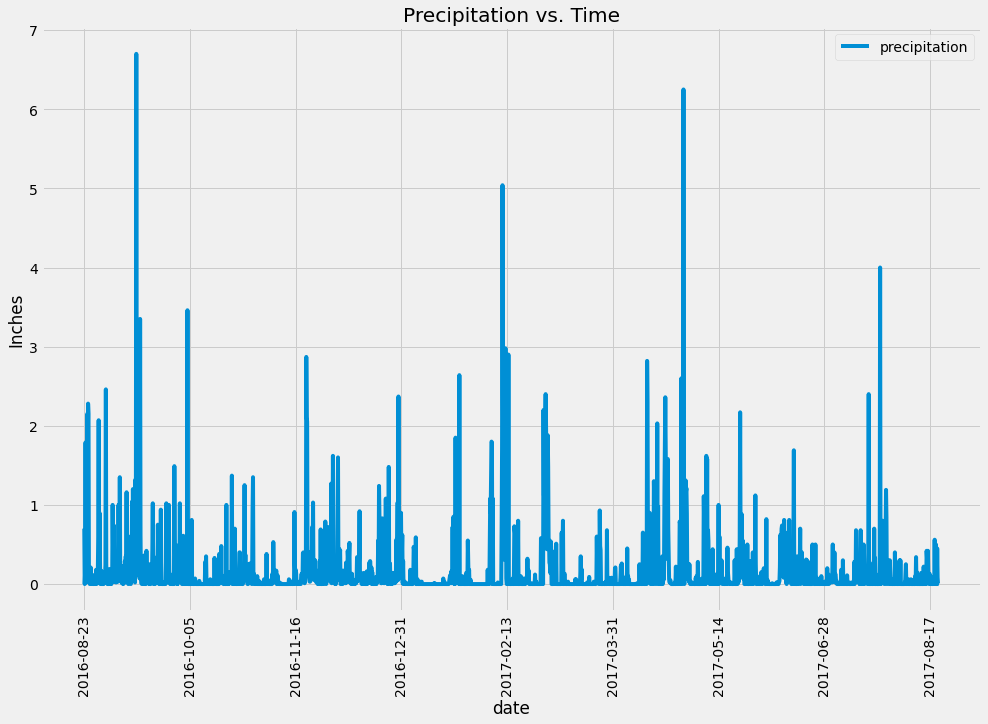

In [20]:
plot_twelve = new_df.plot(figsize=(15,10))
plt.xticks(rotation=90)
plt.title('Precipitation vs. Time')
plt.ylabel("Inches")
plt.grid(True)
plt.show()

# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number stations in the dataset
recent_station = session.query(station).\
    order_by(station.id).statement
recent_station_df = pd.read_sql_query(recent_station, session.bind)
recent_station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [22]:
station_sel = [func.count(station.station)]

count_station = session.query(*station_sel).\
    order_by(station.station).all()
count_station

[(9)]

In [49]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

full_station_sel = [measurement.station,
                    func.count(measurement.station)]

full_count_station = session.query(*full_station_sel).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
full_count_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

sel = [measurement.station,
       func.min(measurement.tobs),
       func.max(measurement.tobs),
       func.avg(measurement.tobs)]

active_station = session.query(*sel).\
    filter(measurement.station =='USC00519281').\
    order_by(measurement.station).all()
active_station

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
recent_measurement = session.query(measurement.station, measurement.date, measurement.tobs).\
    filter(measurement.station =='USC00519281').\
    filter(measurement.date > '2016-08-22').statement
recent_measurement_df = pd.read_sql_query(recent_measurement, session.bind)
recent_measurement_df

,station,date,tobs
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0
...,...,...,...
347,USC00519281,2017-08-14,77.0
348,USC00519281,2017-08-15,77.0
349,USC00519281,2017-08-16,76.0
350,USC00519281,2017-08-17,76.0


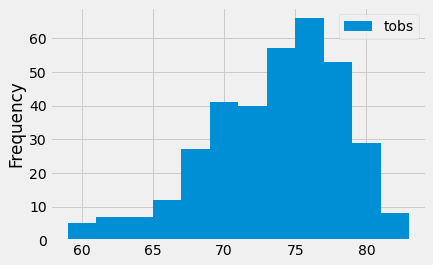

In [29]:
active_df = recent_measurement_df[['tobs']]
active_df.plot.hist(bins=12)
plt.grid(True)
plt.show()

# Close session

In [30]:
# Close Session
session.close()